# Raw dataset EDA

In [1]:
import os

os.chdir("../..")

In [2]:
!pwd

/Users/wiktorlazarski/Desktop/my_project/head-segmentation


In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
RAW_DSET_PATH = os.path.join(os.getcwd(), "data", "celeba_raw")

In [5]:
FILE_MAPPING_DATA_PATH = os.path.join(RAW_DSET_PATH, "CelebA-HQ-to-CelebA-mapping.txt")

In [6]:
with open(FILE_MAPPING_DATA_PATH, "r") as file:
    lines = file.readlines()

In [7]:
headers = lines[0].split()[1:]

In [8]:
headers

['orig_idx', 'orig_file']

In [9]:
samples = [sample.split()[1:] for sample in lines[1:]]

In [10]:
samples[:10]

[['119613', '119614.jpg'],
 ['99094', '099095.jpg'],
 ['200121', '200122.jpg'],
 ['81059', '081060.jpg'],
 ['202040', '202041.jpg'],
 ['614', '000615.jpg'],
 ['50915', '050916.jpg'],
 ['166545', '166546.jpg'],
 ['143861', '143862.jpg'],
 ['101741', '101742.jpg']]

In [11]:
mappings_df = pd.DataFrame(samples, columns=headers)

In [12]:
mappings_df.head()

,orig_idx,orig_file
0,119613,119614.jpg
1,99094,099095.jpg
2,200121,200122.jpg
3,81059,081060.jpg
4,202040,202041.jpg


In [13]:
ATTRIBS_DATA_PATH = os.path.join(RAW_DSET_PATH, "CelebAMask-HQ-attribute-anno.txt")

In [14]:
with open(ATTRIBS_DATA_PATH, "r") as file:
    lines = file.readlines()

In [15]:
lines[0]

'30000\n'

In [16]:
len(lines)

30002

In [17]:
headers = lines[1].split()

In [18]:
headers.insert(0, "Filename")

In [19]:
headers

['Filename',
 '5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [20]:
samples = [sample.split() for sample in lines[2:]]

In [21]:
len(headers)

41

In [22]:
len(samples[0])

41

In [23]:
attribs_df = pd.DataFrame(samples, columns=headers)

In [24]:
attribs_df.head()

,Filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0.jpg,-1,1,1,1,-1,-1,1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
1,1.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
2,2.jpg,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
3,3.jpg,-1,-1,1,-1,-1,-1,-1,1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
4,4.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,1


In [25]:
attribs_df = attribs_df.applymap(lambda x: x if x != "-1" else 0)

In [26]:
IMAGES_DIR_PATH = Path(os.path.join(RAW_DSET_PATH, "CelebA-HQ-img"))
MASKS_DIR_PATH = Path(os.path.join(RAW_DSET_PATH, "CelebAMask-HQ-mask-anno"))

In [27]:
attribs_df.head(n=10)

,Filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0.jpg,0,1,1,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
1,1.jpg,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
2,2.jpg,0,0,1,1,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,1
3,3.jpg,0,0,1,0,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,1
4,4.jpg,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
5,5.jpg,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,1
6,6.jpg,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
7,7.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
8,8.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
9,9.jpg,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
file9 = attribs_df[attribs_df.Filename == "9.jpg"].to_dict("list")

In [29]:
for k, v in file9.items():
    if v[0] == 1:
        print(k)

In [30]:
parts = set()
for image_file in MASKS_DIR_PATH.rglob("*.png"):
    parts.add(image_file.stem[6:])

In [31]:
head_parts = {
    "ear_r",
    "eye_g",
    "hair",
    "hat",
    "l_brow",
    "l_ear",
    "l_eye",
    "l_lip",
    "mouth",
    "nose",
    "r_brow",
    "r_ear",
    "r_eye",
    "skin",
    "u_lip"
}

In [32]:
sorted(parts)

['cloth',
 'ear_r',
 'eye_g',
 'hair',
 'hat',
 'l_brow',
 'l_ear',
 'l_eye',
 'l_lip',
 'mouth',
 'neck',
 'neck_l',
 'nose',
 'r_brow',
 'r_ear',
 'r_eye',
 'skin',
 'u_lip']

In [33]:
mask_files = sorted(list(MASKS_DIR_PATH.rglob("*.png")))

In [34]:
mask_dict = {}
for mask_file in mask_files:
    image_filename = mask_file.stem
    
    mask_type = image_filename[6:]
    if mask_type not in head_parts:
        continue
    
    image_id = image_filename[:5].lstrip("0")
    image_id = image_id if image_id else "0"
    if image_id not in mask_dict.keys():
        mask_dict[image_id] = []
    
    mask_dict[image_id].append(mask_file)

In [35]:
for image_id, mask_paths in mask_dict.items():
    mask_images = [
        cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE) for mask_file in mask_paths
    ]
    break

In [36]:
mask_dict["0"]

[PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/celeba_raw/CelebAMask-HQ-mask-anno/0/00000_hair.png'),
 PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/celeba_raw/CelebAMask-HQ-mask-anno/0/00000_l_brow.png'),
 PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/celeba_raw/CelebAMask-HQ-mask-anno/0/00000_l_eye.png'),
 PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/celeba_raw/CelebAMask-HQ-mask-anno/0/00000_l_lip.png'),
 PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/celeba_raw/CelebAMask-HQ-mask-anno/0/00000_mouth.png'),
 PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/celeba_raw/CelebAMask-HQ-mask-anno/0/00000_nose.png'),
 PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/celeba_raw/CelebAMask-HQ-mask-anno/0/00000_r_brow.png'),
 PosixPath('/Users/wiktorlazarski/Desktop/my_project/head-segmentation/data/

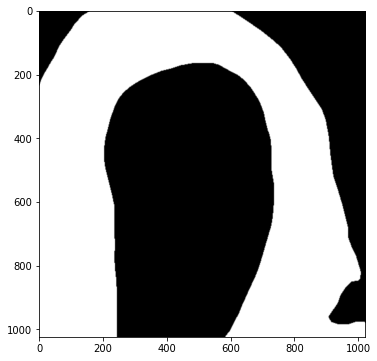

In [37]:
segmap = cv2.resize(mask_images[0], (1024, 1024))

plt.figure(figsize=(8,6))
plt.imshow(segmap, cmap="gray")

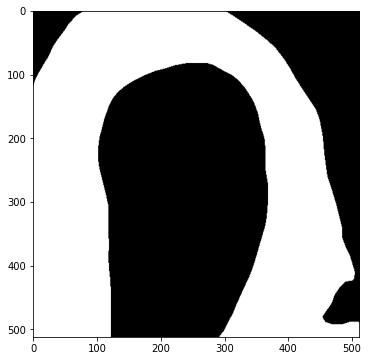

In [38]:
plt.figure(figsize=(8,6))
plt.imshow(mask_images[0], cmap="gray")

In [39]:
np.unique(mask_images[0])

array([  0, 255], dtype=uint8)

In [40]:
mask_images = np.array(mask_images)

In [41]:
sumarr = mask_images.sum(axis=0)

In [42]:
np.unique(sumarr)

array([   0,  255,  510,  765, 1020], dtype=uint64)

In [43]:
sumarr[sumarr > 0] = 1

In [44]:
np.unique(sumarr)

array([0, 1], dtype=uint64)

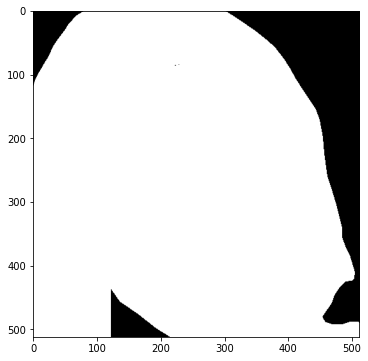

In [45]:
plt.figure(figsize=(8,6))
plt.imshow(sumarr, cmap="gray")

In [46]:
mask_images[0].dtype

dtype('uint8')

In [47]:
sumarr.shape

(512, 512)

In [48]:
sumarr2 = cv2.resize(sumarr.astype(np.uint8), (1024, 1024))

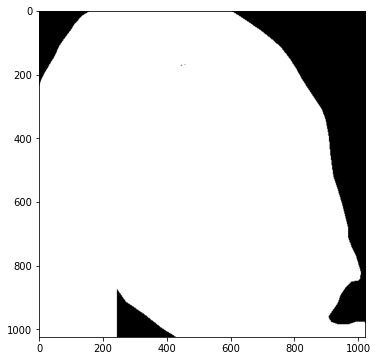

In [49]:
plt.figure(figsize=(8,6))
plt.imshow(sumarr2, cmap="gray")